In [503]:

import pandas as pd
import numpy as np
import seaborn as sns
import plotly.express as px
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt
#reading data
df=pd.read_excel("Tenders__.xlsx")
df.head()

Tender Type  Regions  Conditionsbookletprice Tender Status  \
0  Direct purchase   city11                     0.0     completed   
1  Direct purchase   city11                     0.0     completed   
2  Direct purchase   city11                     0.0     completed   
3   Limited tender   city11                     0.0     completed   
4   Limited tender   city11                     0.0     completed   

  Invitation Type           Submitiondate Lastofferpresentationdate  \
0         private 2019-12-18 13:51:58.332       2019-12-23 00:00:00   
1         private 2019-12-18 13:51:58.332       2019-12-23 00:00:00   
2         private 2019-12-22 12:53:07.624       2019-12-31 00:00:00   
3         private 2019-12-23 19:37:15.997       2019-12-26 00:00:00   
4         private 2019-12-23 19:37:15.997       2019-12-26 00:00:00   

                                  Activity Name  Estimatedvalue  Invit Count  \
0          Trade of tools, machines and devices    19444.444444            7   
1                        information technology    19444.444444            7   
2                          Insurance Activities    32777.777778            7   
3          Trade of tools, machines and devices   179444.444444            5   
4  Trading of utensils and household appliances   179444.444444            5   

   categories_count  regions_count latest_awarding_date  
0                 2              1  2020-02-13 13:18:27  
1                 2              1  2020-02-13 13:18:27  
2                 1              1  2020-02-13 13:12:54  
3                 3              1  2020-02-20 17:47:36  
4                 3              1  2020-02-20 17:47:36

In [516]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 160384 entries, 0 to 160731
Data columns (total 13 columns):
 #   Column                     Non-Null Count   Dtype         
---  ------                     --------------   -----         
 0   Tender Type                160384 non-null  object        
 1   Regions                    160384 non-null  object        
 2   Conditionsbookletprice     160384 non-null  float64       
 3   Tender Status              160384 non-null  object        
 4   Invitation Type            160384 non-null  object        
 5   Submitiondate              159511 non-null  datetime64[ns]
 6   Lastofferpresentationdate  160384 non-null  object        
 7   Activity Name              160384 non-null  object        
 8   Estimatedvalue             160384 non-null  float64       
 9   Invit Count                160384 non-null  int64         
 10  categories_count           160384 non-null  int64         
 11  regions_count              160384 non-null  int64   

In [517]:
df.columns

Index(['Tender Type', 'Regions', 'Conditionsbookletprice', 'Tender Status',
       'Invitation Type', 'Submitiondate', 'Lastofferpresentationdate',
       'Activity Name', 'Estimatedvalue', 'Invit Count', 'categories_count',
       'regions_count', 'latest_awarding_date'],
      dtype='object')

In [518]:
df["Tender Status"].value_counts()

completed    103364
cancelled     57020
Name: Tender Status, dtype: int64

In [519]:
df.describe()

Conditionsbookletprice  Estimatedvalue    Invit Count  \
count            1.603840e+05    1.603840e+05  160384.000000   
mean             2.801749e+03    3.963996e+05       5.925123   
std              9.410382e+05    3.884232e+06      16.010668   
min              0.000000e+00    0.000000e+00       0.000000   
25%              0.000000e+00    1.055556e+04       1.000000   
50%              0.000000e+00    3.410082e+04       2.000000   
75%              0.000000e+00    5.784667e+04       5.000000   
max              3.764197e+08    5.183959e+08     483.000000   

       categories_count  regions_count  
count     160384.000000  160384.000000  
mean           1.469367       1.142782  
std            1.025757       1.114346  
min            1.000000       0.000000  
25%            1.000000       1.000000  
50%            1.000000       1.000000  
75%            2.000000       1.000000  
max           17.000000      13.000000

# PREDICTING TENDERS SUCCESS 
**Based on the data we have null values in:**
1. Regions
2. Conditionsbookletprice
3. Invitation Type
4. Submitiondate
5. Lastofferpresentationdate
6. Activity Name
7. Estimatedvalue
8. latest_awarding_date

In [520]:
df["Regions"].describe()

count      160384
unique       1675
top        city11
freq        53712
Name: Regions, dtype: object

# Data Cleaning
**Based on the data we have null values in:**
1. Regions : since some tenders are not linked to a specific region , we will fill null values with "No Region"
2. Conditionsbookletprice: since mot all tenders have a booklet price , we will fill nulls with 0
3. Invitation Type: since invitation is not mandatory , we will fill null values with "No Invite"
4. Submitiondate: We will drop tenders with no submission date , since it's considered a draft.
5. Lastofferpresentationdate: we will drop this field
6. Activity Name: since the number of missing values is small , we will drop the rows with no Activity Name
7. Estimatedvalue: we will fill empty estimated values with 0
8. latest_awarding_date: This column will be droped 

In [521]:
df["Regions"]=df["Regions"].fillna("No Region")

In [522]:
df["Regions"].unique()

array([' city11', ' city10- city11', ' city11- city10', ...,
       ' city11- city10- city7 - city4- city8- city9',
       ' city10- city7 - city5 - city4- city8- city6- city1- city9- city3- city11- city13- city12- city2',
       ' city10- city7 - city5 - city4- city8- city9- city3- city6- city1- city11- city2- city13- city12'],
      dtype=object)

In [523]:
#fill nulls with 0s
df["Conditionsbookletprice"]=df["Conditionsbookletprice"].fillna(0)

In [524]:
#fill nulls with No Invite'
df["Invitation Type"]=df["Invitation Type"].fillna("No Invite")

In [525]:
#fill nulls with 0s
df["Estimatedvalue"]=df["Estimatedvalue"].fillna(0)

In [526]:
#drop nulls
df.dropna(subset=["Activity Name"],inplace=True)

In [527]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 160384 entries, 0 to 160731
Data columns (total 13 columns):
 #   Column                     Non-Null Count   Dtype         
---  ------                     --------------   -----         
 0   Tender Type                160384 non-null  object        
 1   Regions                    160384 non-null  object        
 2   Conditionsbookletprice     160384 non-null  float64       
 3   Tender Status              160384 non-null  object        
 4   Invitation Type            160384 non-null  object        
 5   Submitiondate              159511 non-null  datetime64[ns]
 6   Lastofferpresentationdate  160384 non-null  object        
 7   Activity Name              160384 non-null  object        
 8   Estimatedvalue             160384 non-null  float64       
 9   Invit Count                160384 non-null  int64         
 10  categories_count           160384 non-null  int64         
 11  regions_count              160384 non-null  int64   

# Data Cleaning 2
**Regions :** some rows contain multiple regions or cities , we will cover those values to columns to capture it as a feature


In [528]:
#replace spaces 
df["Regions"]=df["Regions"].str.replace(' ','')
df["Regions"].unique()

array(['city11', 'city10-city11', 'city11-city10', ...,
       'city11-city10-city7-city4-city8-city9',
       'city10-city7-city5-city4-city8-city6-city1-city9-city3-city11-city13-city12-city2',
       'city10-city7-city5-city4-city8-city9-city3-city6-city1-city11-city2-city13-city12'],
      dtype=object)

In [529]:
#crete new columns form rows
Regions=['city11','city10','city9','city8','city7','city6','city5','city4','city3','city2','city12','city13','city1']
for r in Regions:
    df[r]=df["Regions"].str.contains(r)
    
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 160384 entries, 0 to 160731
Data columns (total 26 columns):
 #   Column                     Non-Null Count   Dtype         
---  ------                     --------------   -----         
 0   Tender Type                160384 non-null  object        
 1   Regions                    160384 non-null  object        
 2   Conditionsbookletprice     160384 non-null  float64       
 3   Tender Status              160384 non-null  object        
 4   Invitation Type            160384 non-null  object        
 5   Submitiondate              159511 non-null  datetime64[ns]
 6   Lastofferpresentationdate  160384 non-null  object        
 7   Activity Name              160384 non-null  object        
 8   Estimatedvalue             160384 non-null  float64       
 9   Invit Count                160384 non-null  int64         
 10  categories_count           160384 non-null  int64         
 11  regions_count              160384 non-null  int64   

In [530]:
#drop the column
df.drop(inplace=True,axis=1,columns=["Regions"])
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 160384 entries, 0 to 160731
Data columns (total 25 columns):
 #   Column                     Non-Null Count   Dtype         
---  ------                     --------------   -----         
 0   Tender Type                160384 non-null  object        
 1   Conditionsbookletprice     160384 non-null  float64       
 2   Tender Status              160384 non-null  object        
 3   Invitation Type            160384 non-null  object        
 4   Submitiondate              159511 non-null  datetime64[ns]
 5   Lastofferpresentationdate  160384 non-null  object        
 6   Activity Name              160384 non-null  object        
 7   Estimatedvalue             160384 non-null  float64       
 8   Invit Count                160384 non-null  int64         
 9   categories_count           160384 non-null  int64         
 10  regions_count              160384 non-null  int64         
 11  latest_awarding_date       103394 non-null  object  

In [531]:
df["Activity Name"].unique()

array(['Trade of tools, machines and devices', 'information technology',
       'Insurance Activities',
       'Trading of utensils and household appliances',
       'Trading in cars, equipment and machinery', 'luxury trade',
       ' Trading of home furniture, furnishings, curtains and carpets',
       'Trading in clothes, fabrics, perfumes, watches, cosmetics and eyeglasses',
       'textile making', 'Food Trade', 'Security and safety activities',
       'Security Consulting Activities', 'security consulting activities',
       'Engineering Consulting Activities',
       'Trading in building materials, electrical and sanitary ware',
       'Supply of electricity, gas, water, steam and air conditioning',
       'Operation, maintenance and cleaning of facilities',
       'General contracting for buildings (construction, repair, demolition, restoration)',
       'Telecommunications',
       'Publishing, printing, advertising, advertising and artistic production services',
       'Specia

In [532]:
len(df["Activity Name"].unique())

102

# Data Cleaning 3
**Activity Name :** we have more than 100 activity type on this dataset ,we will explore it more


In [533]:
#check word cloud per all tenders peer status
activity_text=" ".join(df["Activity Name"])
activity_text_completed=" ".join(df[df["Tender Status"]=="completed"]["Activity Name"])
activity_text_cancelled=" ".join(df[df["Tender Status"]=="cancelled"]["Activity Name"])

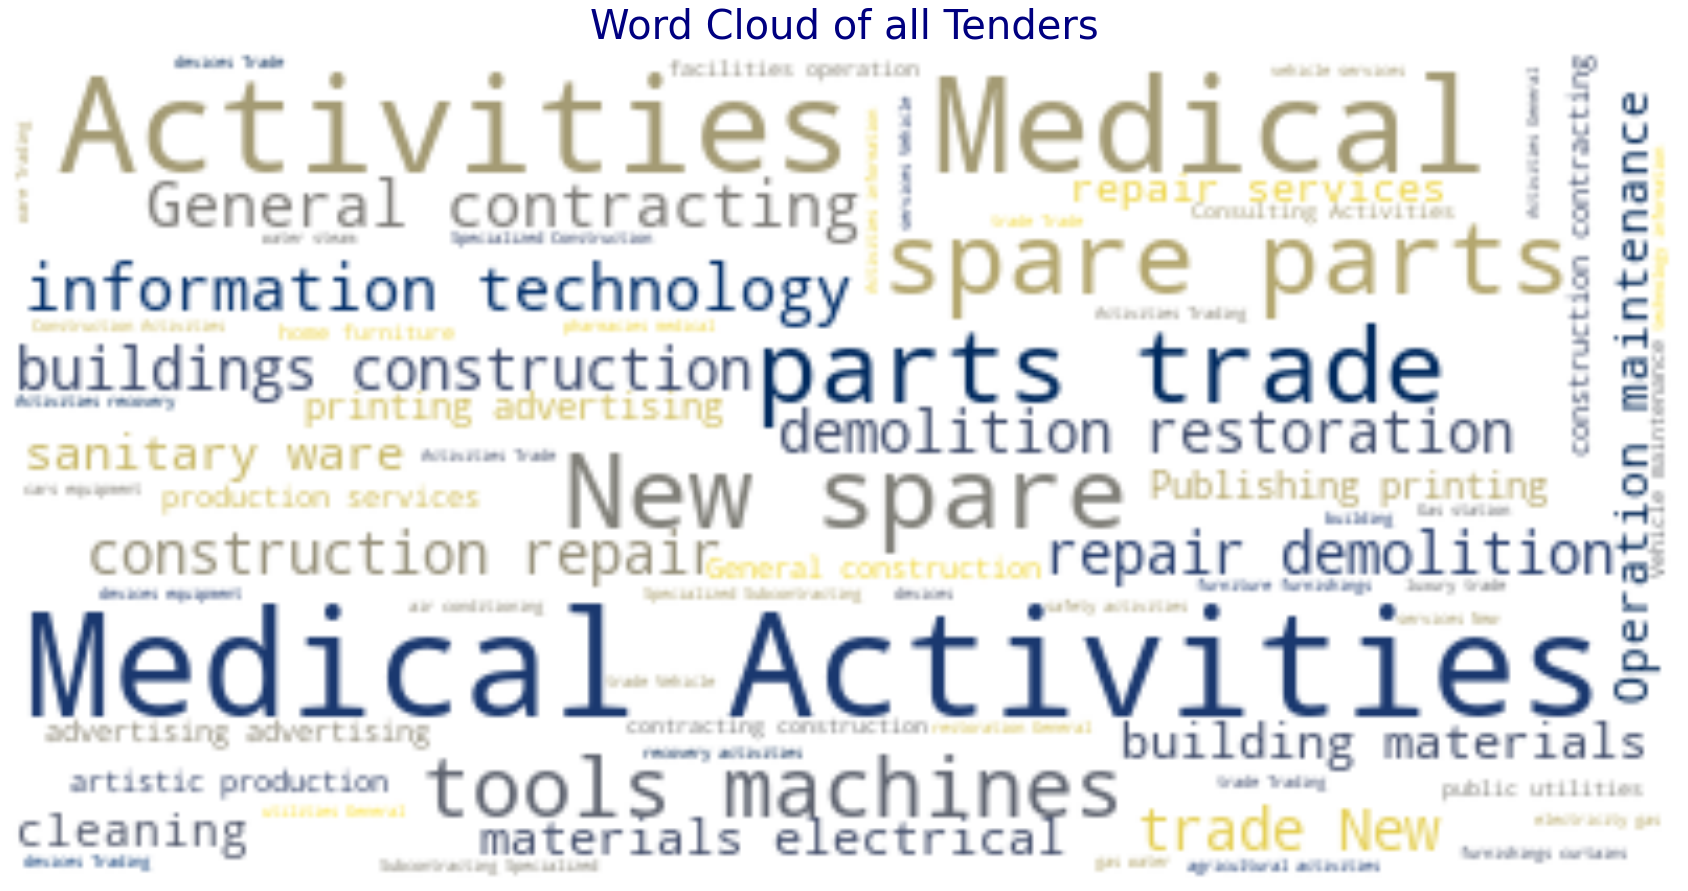

In [535]:
wordcloud = WordCloud(colormap='cividis',background_color="white").generate(activity_text)

# Display the generated image

plt.figure(figsize=(30, 30))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("Word Cloud of all Tenders",fontsize=40,color="navy")
plt.show()


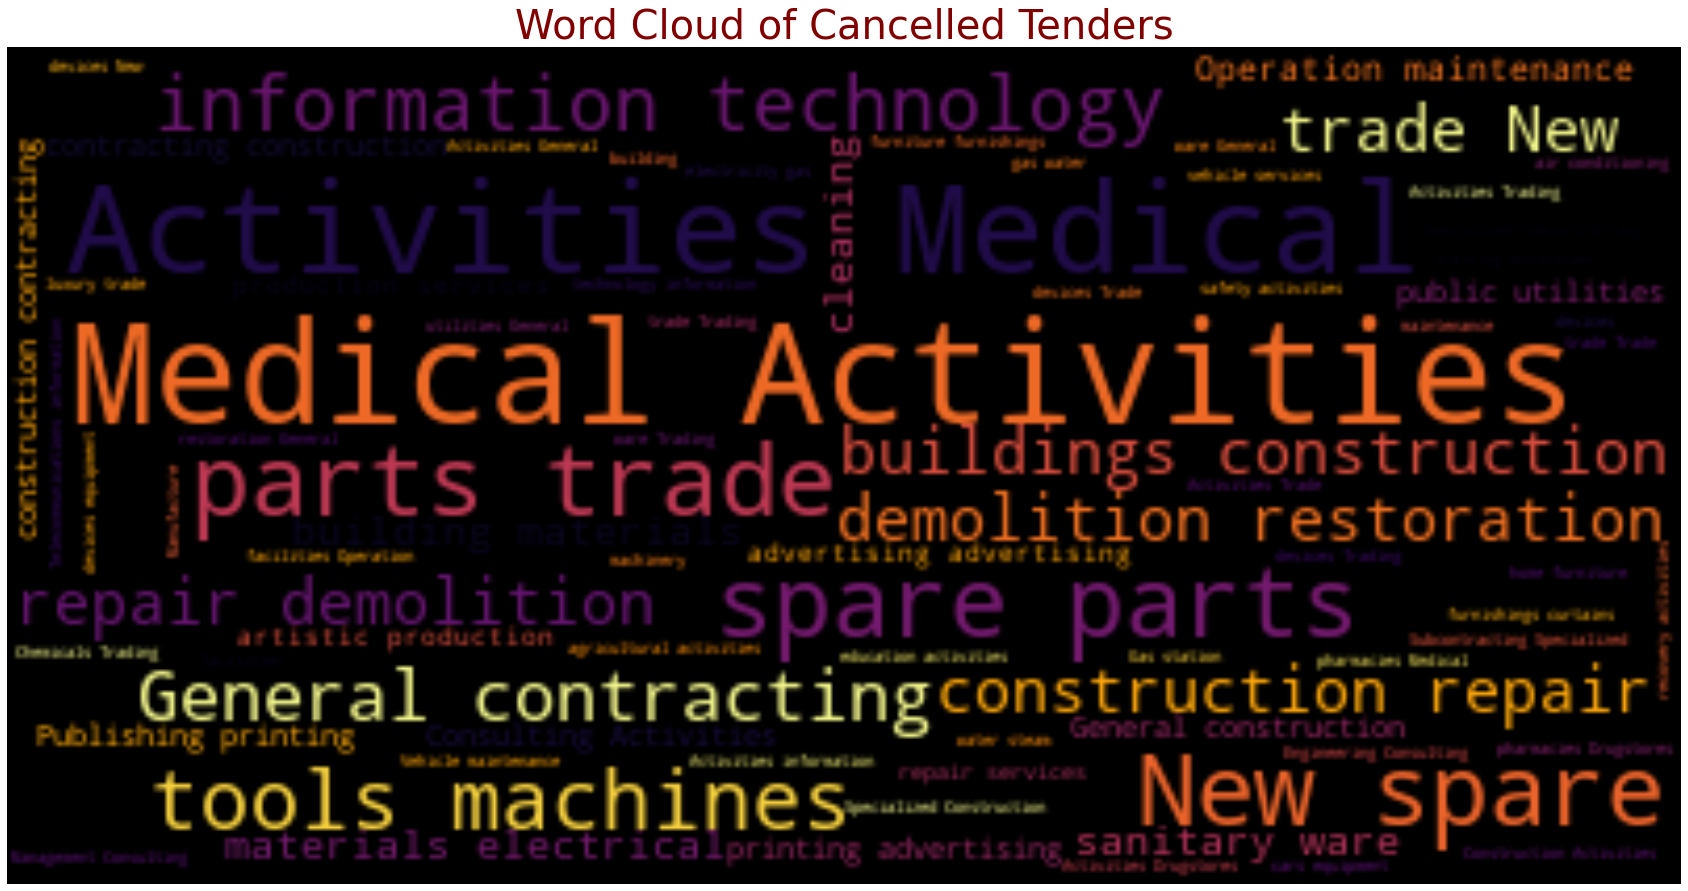

In [536]:
wordcloud = WordCloud(colormap="inferno").generate(activity_text_cancelled)

# Display the generated image:
plt.figure(figsize=(30, 30))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("Word Cloud of Cancelled Tenders",fontsize=40,color="maroon")
plt.show()

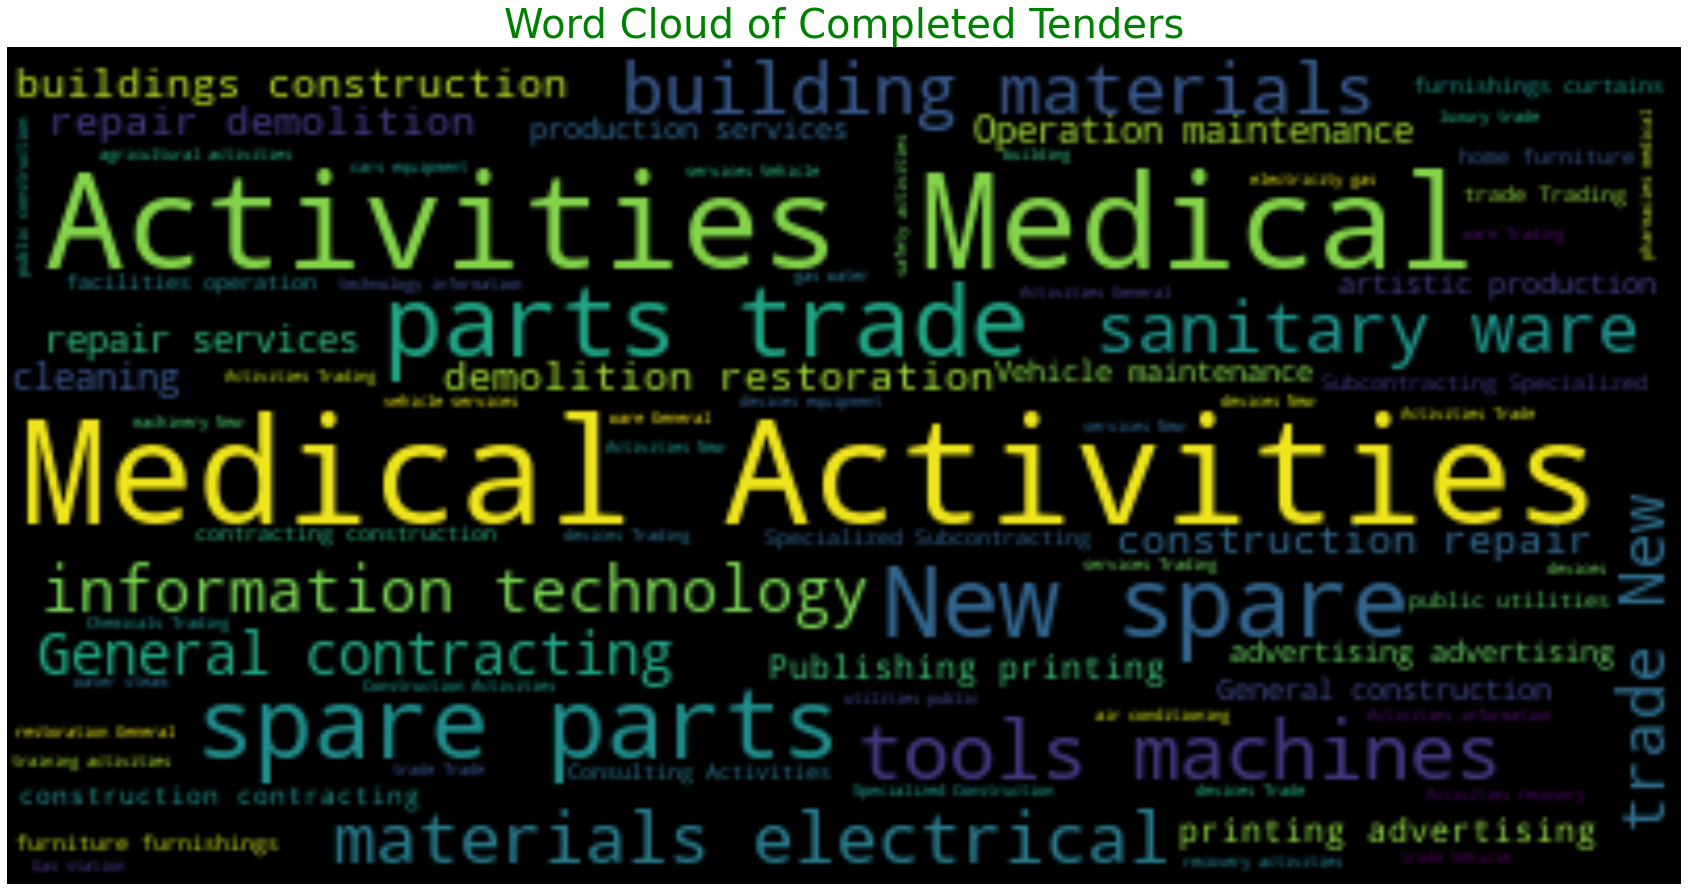

In [537]:
wordcloud = WordCloud(colormap="viridis").generate(activity_text_completed)

# Display the generated image:
plt.figure(figsize=(30, 30))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title("Word Cloud of Completed Tenders",fontsize=40,color="Green")
plt.axis("off")
plt.show()

# Exploring Activity Name
**As shown in wordclouds for all tenders, completed tenders & cancelled tenders , we can see almost the same words are repeated and not assiossiated with a class therefore this field will be dropped** 

# Data Cleaning 4
**All the dates will be dropped** 

In [538]:
df.drop(axis=1,columns=["Submitiondate","Lastofferpresentationdate","Activity Name","latest_awarding_date"], inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 160384 entries, 0 to 160731
Data columns (total 21 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   Tender Type             160384 non-null  object 
 1   Conditionsbookletprice  160384 non-null  float64
 2   Tender Status           160384 non-null  object 
 3   Invitation Type         160384 non-null  object 
 4   Estimatedvalue          160384 non-null  float64
 5   Invit Count             160384 non-null  int64  
 6   categories_count        160384 non-null  int64  
 7   regions_count           160384 non-null  int64  
 8   city11                  160384 non-null  bool   
 9   city10                  160384 non-null  bool   
 10  city9                   160384 non-null  bool   
 11  city8                   160384 non-null  bool   
 12  city7                   160384 non-null  bool   
 13  city6                   160384 non-null  bool   
 14  city5               

# Data Processing
**The categorical columns will be converted to columns using one-hot encoding** 
1. Invitation Type
2. Tender Type
3. Tender Status

In [539]:
df["Invitation Type"].value_counts()

private      91916
public       60346
No Invite     8122
Name: Invitation Type, dtype: int64

In [540]:
#create dummies
df=pd.get_dummies(df,columns=["Invitation Type"], prefix='Invitation_Type',drop_first=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 160384 entries, 0 to 160731
Data columns (total 22 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   Tender Type              160384 non-null  object 
 1   Conditionsbookletprice   160384 non-null  float64
 2   Tender Status            160384 non-null  object 
 3   Estimatedvalue           160384 non-null  float64
 4   Invit Count              160384 non-null  int64  
 5   categories_count         160384 non-null  int64  
 6   regions_count            160384 non-null  int64  
 7   city11                   160384 non-null  bool   
 8   city10                   160384 non-null  bool   
 9   city9                    160384 non-null  bool   
 10  city8                    160384 non-null  bool   
 11  city7                    160384 non-null  bool   
 12  city6                    160384 non-null  bool   
 13  city5                    160384 non-null  bool   
 14  city

In [541]:
df.columns

Index(['Tender Type', 'Conditionsbookletprice', 'Tender Status',
       'Estimatedvalue', 'Invit Count', 'categories_count', 'regions_count',
       'city11', 'city10', 'city9', 'city8', 'city7', 'city6', 'city5',
       'city4', 'city3', 'city2', 'city12', 'city13', 'city1',
       'Invitation_Type_private', 'Invitation_Type_public'],
      dtype='object')

# Exploratory Data Analysis(EDA)
**Tender Type :**
### looking at the plots we can notice:
1. Highest proption of tender are direct purchases
2. Most post qualification tenders are cancelled
3. We can see high cancllation rates in general & limited tenders

Text(0.5, 1.0, 'Tender Type Distribution')

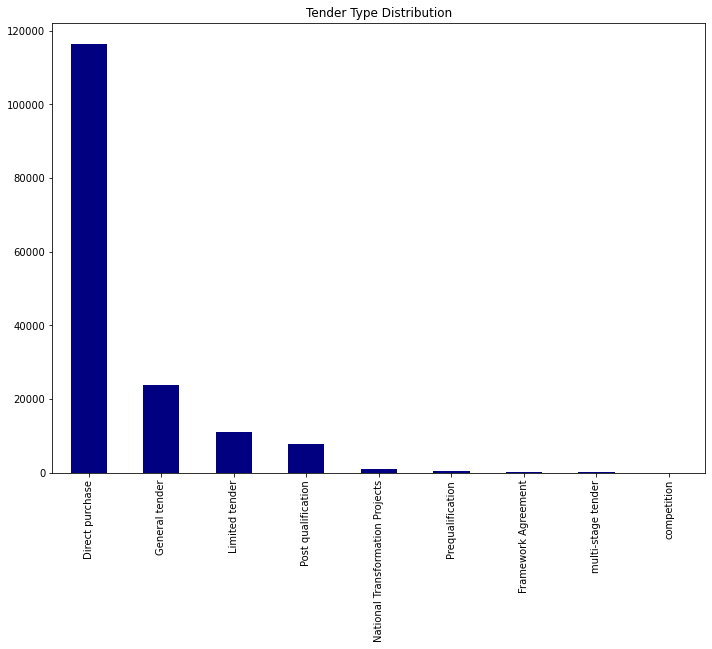

In [542]:

fig, ax = plt.subplots()
fig.set_size_inches(11.7, 8.27)
plt.xticks(rotation=45)
df['Tender Type'].value_counts().plot.bar(color="navy")
plt.title("Tender Type Distribution")
#.hist(figsize=(10,10));

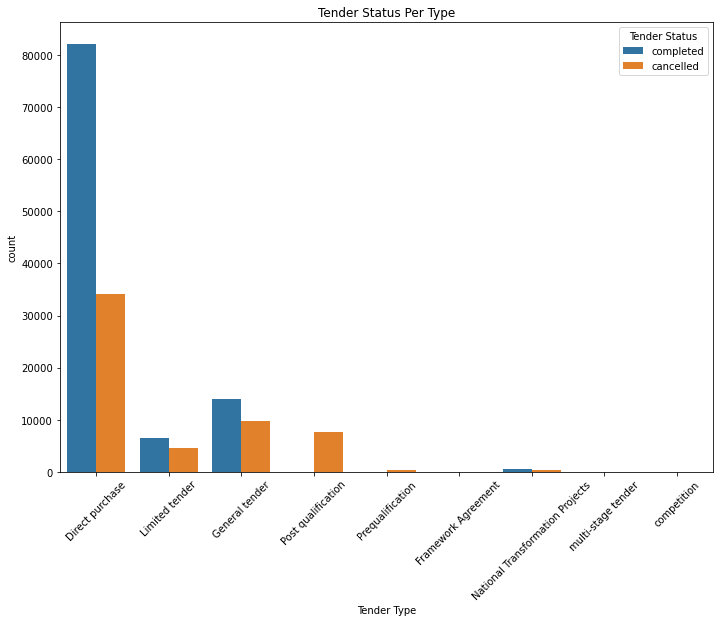

In [471]:

fig, ax = plt.subplots()
fig.set_size_inches(11.7, 8.27)
plt.xticks(rotation=45)
plt.title("Tender Status Per Type")
ax.set(xlabel='Tender Type', ylabel='Count')
ax = sns.countplot(x="Tender Type", hue="Tender Status", data=df)



**Conditionsbookletprice :**
### looking at the plots we can notice:
1. Most of tenders have no Conditions booklet price
2. The values are far away 
3. Looking at tenders with Conditions booklet price higher than 100K SAR, most of them are cancelled
4. Tenders with booklet price between 1-100 SAR , the odds are equal based on the data for completion or cancellation
5. Tenders with no Conditions booklet price have more propability of being completed based on the data

In [546]:
fig = px.histogram(df, x='Conditionsbookletprice',color="Tender Status",nbins=70,title="Conditions Booklet Price Distribution")
fig.show()

In [547]:
df_high_Conditionsbookletprice=df[(df['Conditionsbookletprice']>100) & (df['Conditionsbookletprice']<100000)]
fig = px.histogram(df_high_Conditionsbookletprice, x='Conditionsbookletprice',color="Tender Status",nbins=70,title="Conditions Booklet Price with values 100-100K SAR")
fig.show()

In [548]:
df_very_high_Conditionsbookletprice=df[(df['Conditionsbookletprice']>100000) & (df['Conditionsbookletprice']<1000000)]
fig = px.histogram(df_very_high_Conditionsbookletprice, x='Conditionsbookletprice',color="Tender Status",nbins=70,title="Conditions Booklet Price with values 100K-1M SAR")
fig.show()

In [549]:
df_low_Conditionsbookletprice=df[(df['Conditionsbookletprice']>0) & (df['Conditionsbookletprice']<100)]
fig = px.histogram(df_low_Conditionsbookletprice, x='Conditionsbookletprice',color="Tender Status",nbins=70,title="Conditions Booklet Price with values 1-100 SAR")
fig.show()

In [550]:
df_very_low_Conditionsbookletprice=df[(df['Conditionsbookletprice']==0) ]
fig = px.histogram(df_very_low_Conditionsbookletprice, x='Conditionsbookletprice',color="Tender Status",nbins=1,title="Tenders With No Conditions Booklet Price")
fig.show()


**Invit Count:**
### looking at the plots we can notice:
1. Most of tenders have no Invitations
2. Looking at tenders with Invitations higher than 50,we can see more tenders are cancelled
4. Tenders with booklet price between 1-100 SAR , the odds are equal based on the data for completion or cancellation
5. Tenders with no Conditions booklet price have more propability of being completed based on the data

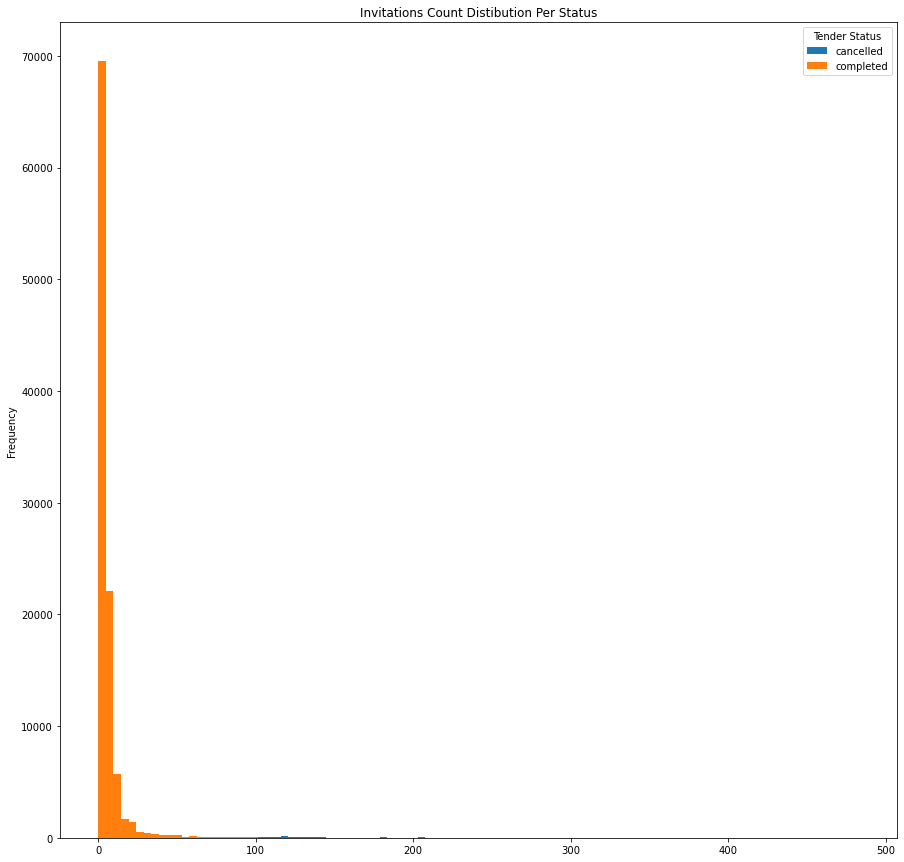

In [551]:

df.pivot(columns="Tender Status", values="Invit Count").plot.hist(bins=100,figsize = (15,15),title="Invitations Count Distibution Per Status")

plt.show()

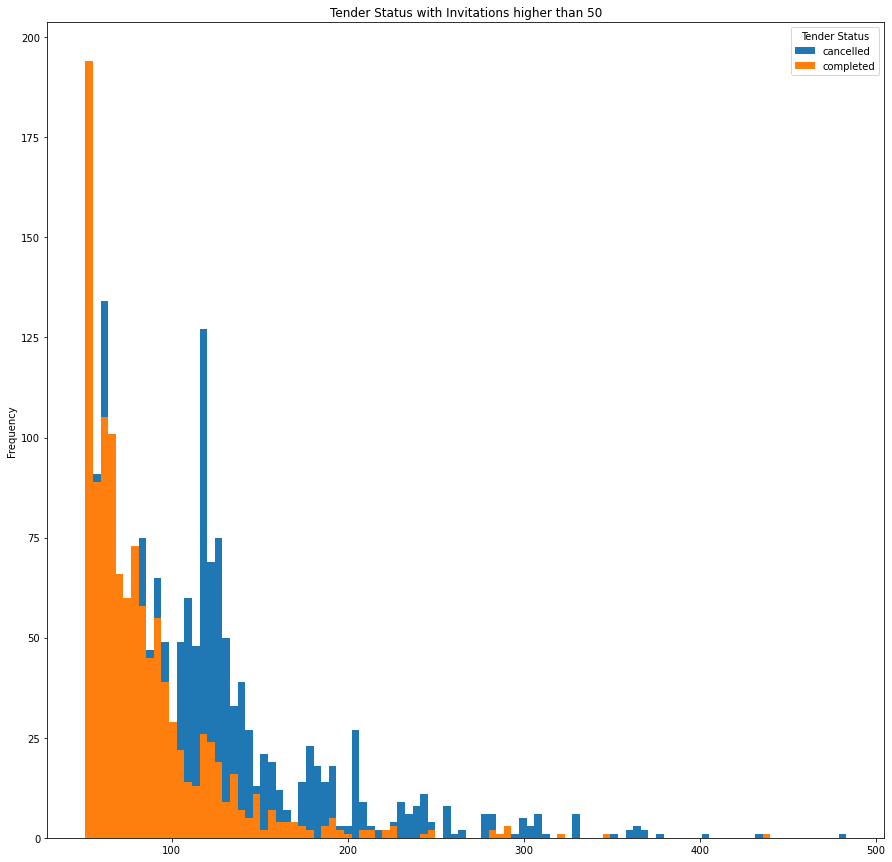

In [552]:

df_high_Invit=df[(df['Invit Count']>50) ]
df_high_Invit.pivot(columns="Tender Status", values="Invit Count").plot.hist(bins=100,figsize = (15,15),title="Tender Status with Invitations higher than 50")

plt.show()

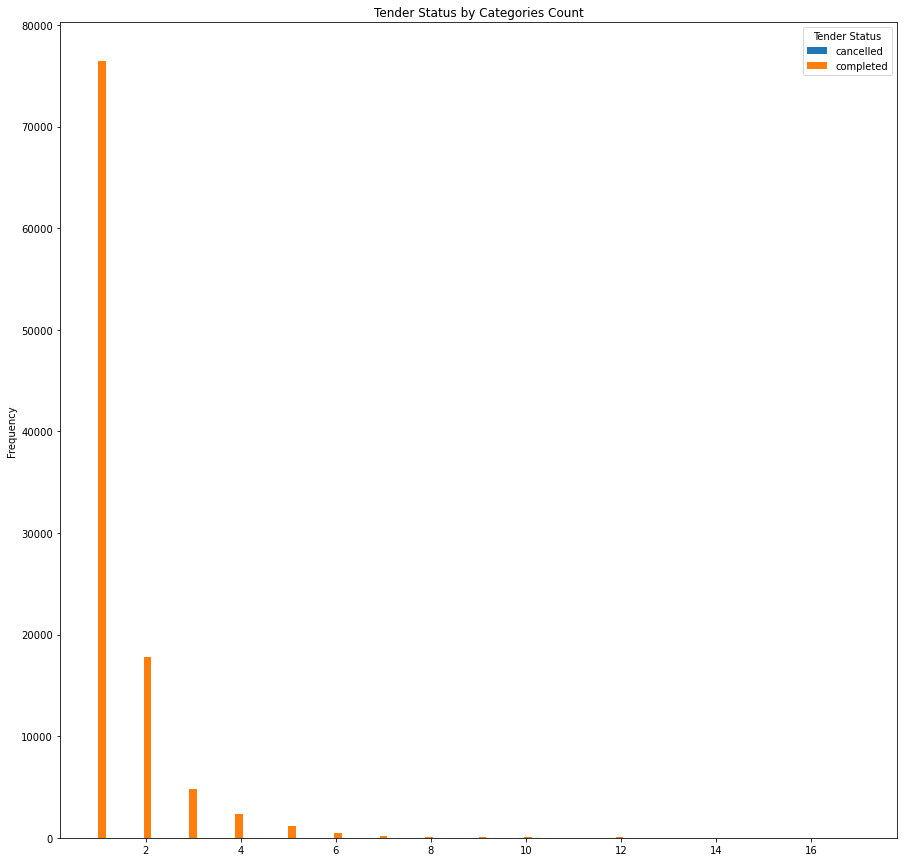

In [553]:
df.pivot(columns="Tender Status", values="categories_count").plot.hist(bins=100,figsize = (15,15),title="Tender Status by Categories Count")

plt.show()

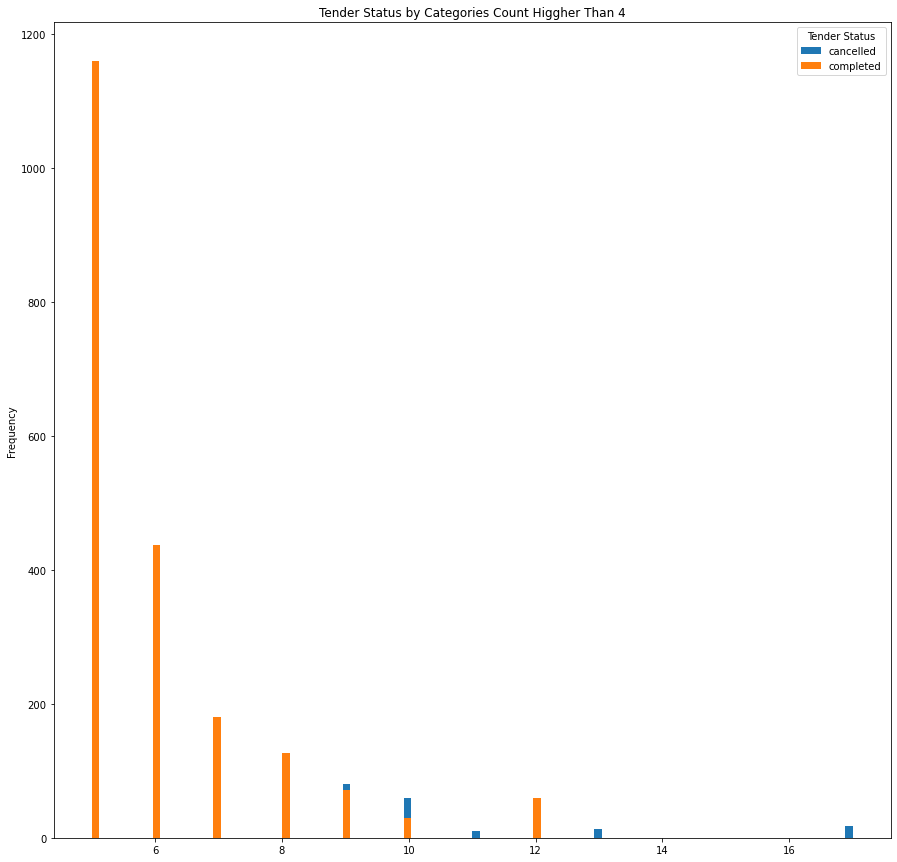

In [554]:
df_high_cat=df[(df['categories_count']>4) ]
df_high_cat.pivot(columns="Tender Status", values="categories_count").plot.hist(bins=100,figsize = (15,15),title="Tender Status by Categories Count Higgher Than 4")

plt.show()


**Predicting Tenders Completion:**
### Inorder to build the model we need:
1. Convert the status to binary class and tender type.


In [555]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 160384 entries, 0 to 160731
Data columns (total 22 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   Tender Type              160384 non-null  object 
 1   Conditionsbookletprice   160384 non-null  float64
 2   Tender Status            160384 non-null  object 
 3   Estimatedvalue           160384 non-null  float64
 4   Invit Count              160384 non-null  int64  
 5   categories_count         160384 non-null  int64  
 6   regions_count            160384 non-null  int64  
 7   city11                   160384 non-null  bool   
 8   city10                   160384 non-null  bool   
 9   city9                    160384 non-null  bool   
 10  city8                    160384 non-null  bool   
 11  city7                    160384 non-null  bool   
 12  city6                    160384 non-null  bool   
 13  city5                    160384 non-null  bool   
 14  city

In [556]:
def convert_status(text):
    if text=="completed":
        return 1
    else:
        return 0
df["Status"]=0
df["Status"]=df["Tender Status"].apply(convert_status)
df["Status"].value_counts()

1    103364
0     57020
Name: Status, dtype: int64

In [557]:
df.drop(axis=1,inplace=True,columns=["Tender Status"])

In [558]:
df=pd.get_dummies(df,columns=["Tender Type"], prefix='Tender_Type',drop_first=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 160384 entries, 0 to 160731
Data columns (total 29 columns):
 #   Column                                        Non-Null Count   Dtype  
---  ------                                        --------------   -----  
 0   Conditionsbookletprice                        160384 non-null  float64
 1   Estimatedvalue                                160384 non-null  float64
 2   Invit Count                                   160384 non-null  int64  
 3   categories_count                              160384 non-null  int64  
 4   regions_count                                 160384 non-null  int64  
 5   city11                                        160384 non-null  bool   
 6   city10                                        160384 non-null  bool   
 7   city9                                         160384 non-null  bool   
 8   city8                                         160384 non-null  bool   
 9   city7                                         16


**Correlation:**
We can't find linear correlation between featues and status. However, we can find some linear correlation between some features.



<AxesSubplot:>

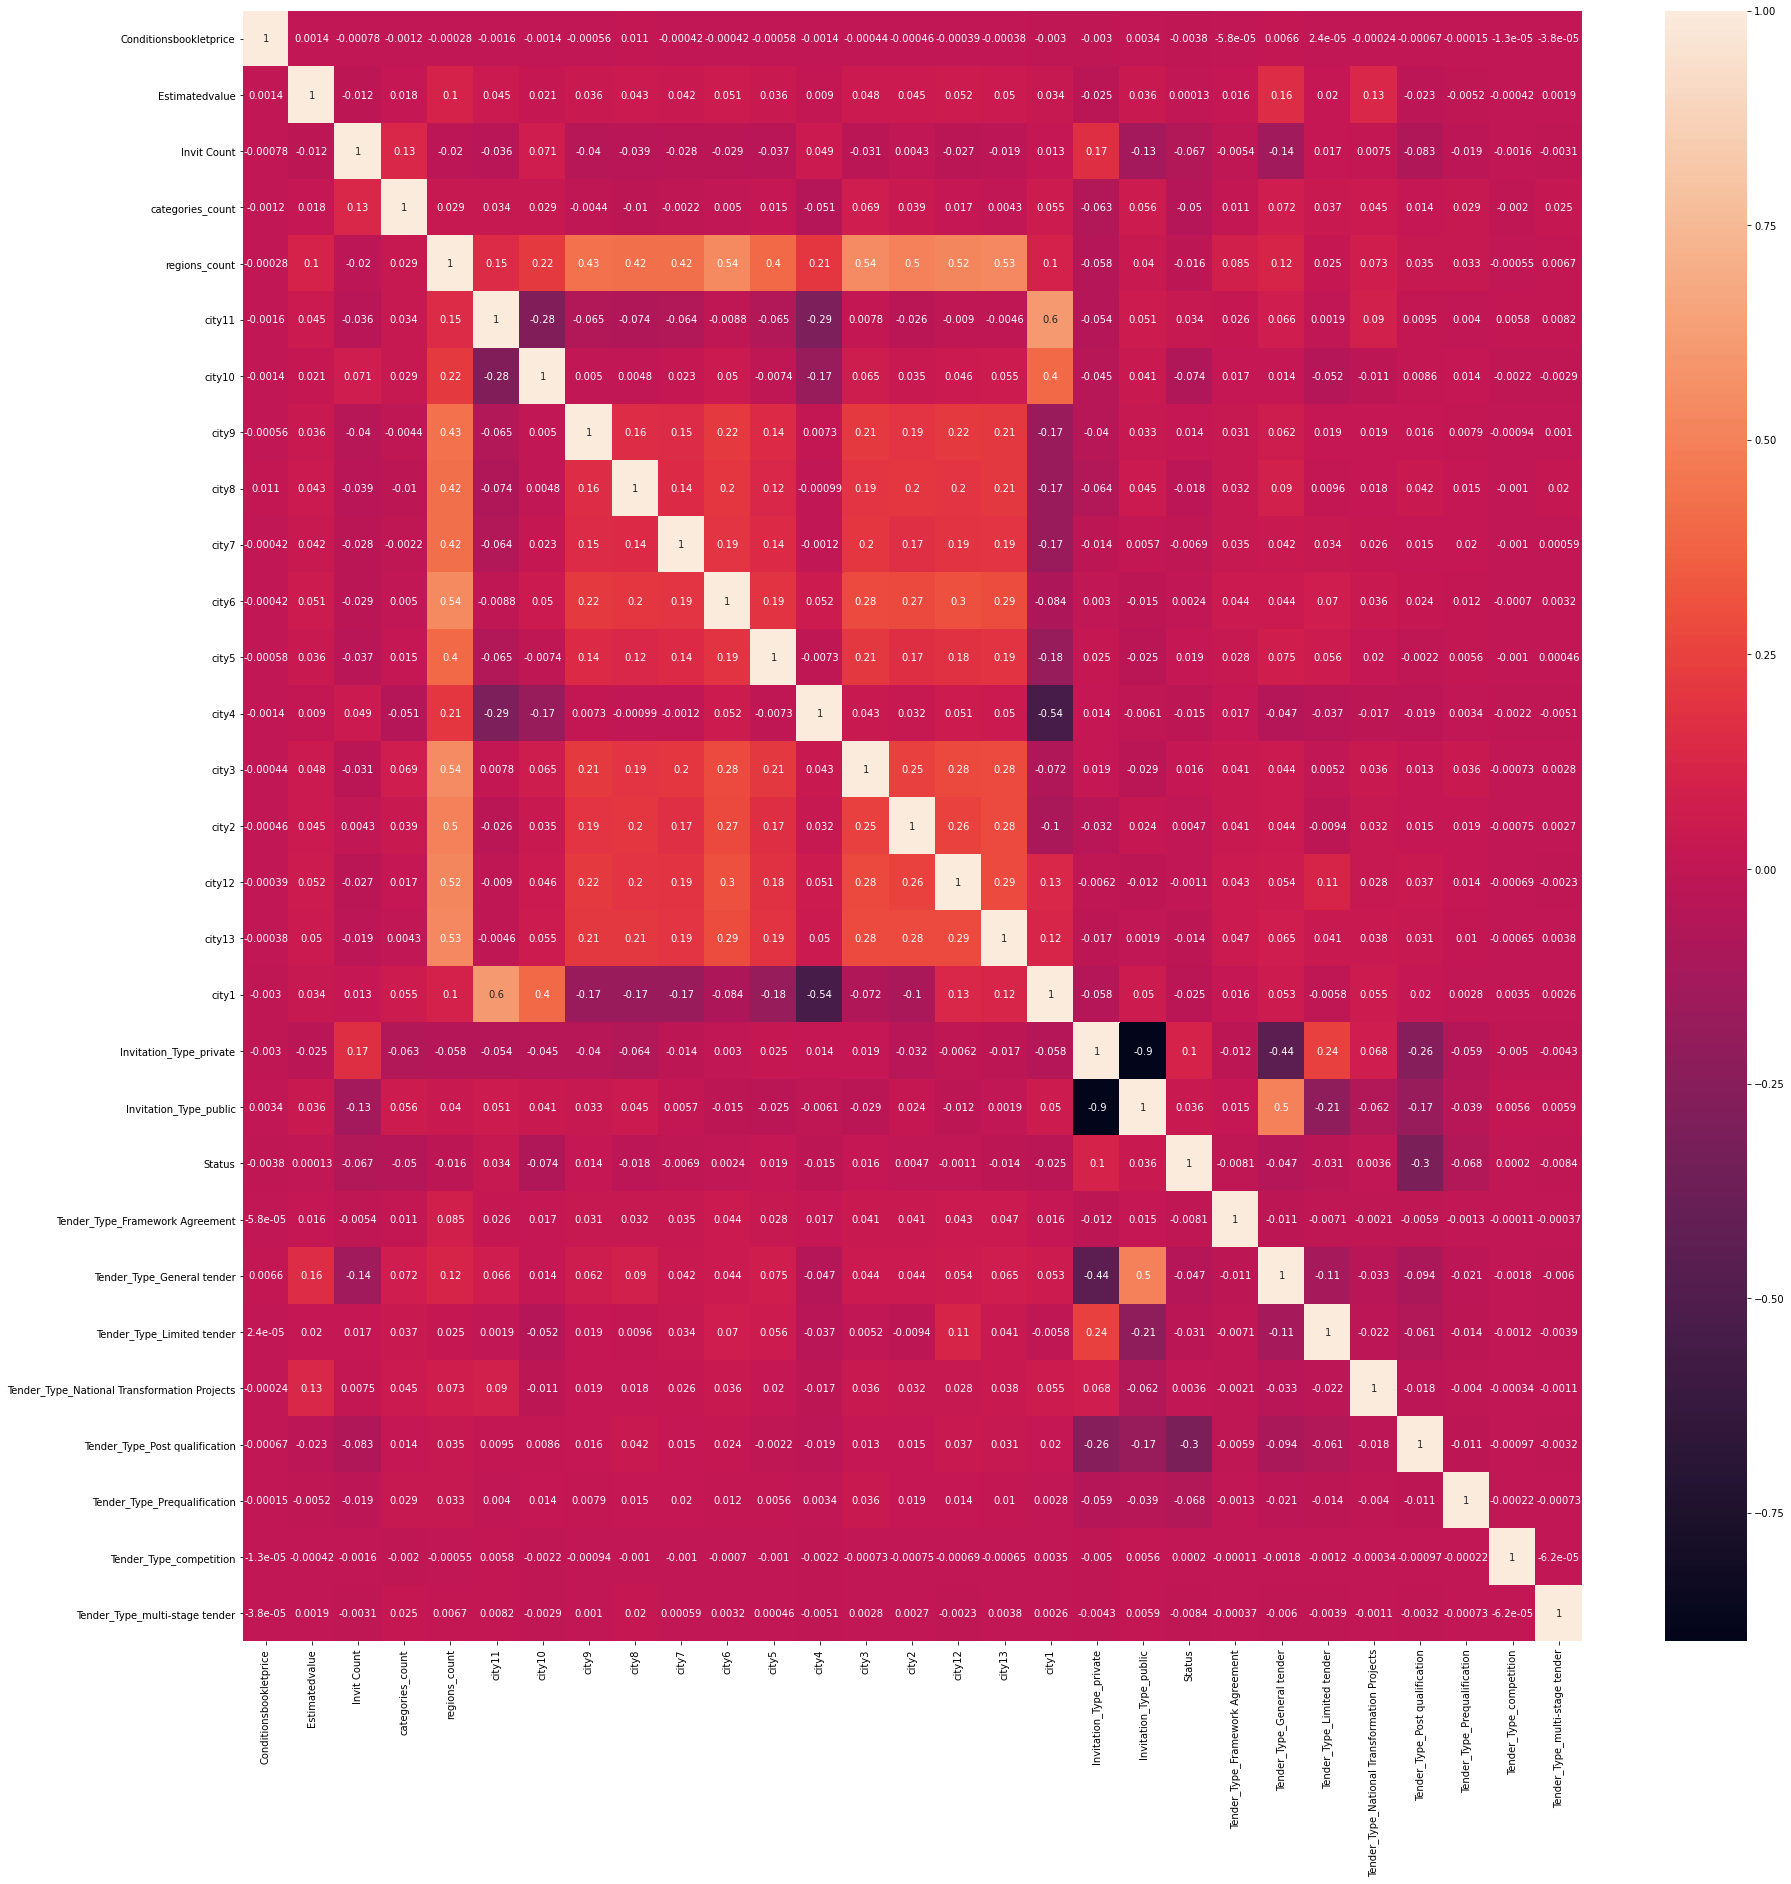

In [559]:
fig, ax = plt.subplots(figsize=(30,30))  
sns.heatmap(df.corr(),annot=True)


**A baseline model:**
### We will build a logestic regression as a baseline:
1. We will have 3 split , train ,test & validation
2. Data swill be scaled
3. Using Logestic regression , the score was almost equal the value of the mean or probability of completion
4. KNN has increased accuracy
5. We will evaluate other modles , then tune the best one with diffrent parameters and cross valiation
6. The error metric will be calculated as number of man hours that might be lost for unpredicted cancelled tenders

In [560]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
X=df[['Conditionsbookletprice', 'Estimatedvalue', 'Invit Count','categories_count',
      'regions_count','city11', 'city10', 'city9', 'city8',
      'city7', 'city6', 'city5','city4', 'city3', 'city2', 'city12', 'city13', 'city1',
      'Invitation_Type_private', 'Invitation_Type_public','Tender_Type_Framework Agreement',
      'Tender_Type_General tender','Tender_Type_Limited tender','Tender_Type_National Transformation Projects',
      'Tender_Type_Post qualification', 'Tender_Type_Prequalification','Tender_Type_competition', 
      'Tender_Type_multi-stage tender']]
y=df["Status"]
X, X_test, y, y_test = train_test_split(X, y, test_size=.2, random_state=100)
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=.25, random_state=300)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train.values)
X_val_scaled = scaler.transform(X_val.values)
X_test_scaled = scaler.transform(X_test.values)
lg = LogisticRegression().fit(X_train, y_train)
print(f'Linear Regression score: {lg.score(X_val, y_val):.3f}')

Linear Regression score: 0.639


In [561]:
df["Status"].mean()

0.6444782521947326

In [562]:

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
print(metrics.accuracy_score(y_test, y_pred))
y_pred_val=knn.predict(X_val)
print("KNN Score ",metrics.accuracy_score(y_val, y_pred_val))

0.7060510646257443
KNN Score  0.7017800916544564
